In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns

In [ ]:
path = kagglehub.dataset_download("arshid/iris-flower-dataset")
iris = pd.read_csv(path + "/IRIS.csv")

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.species.value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packa

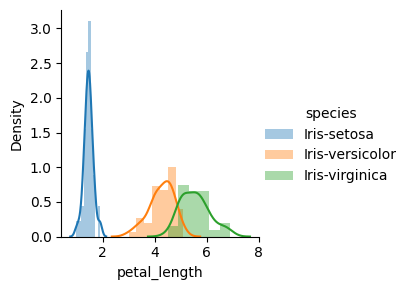

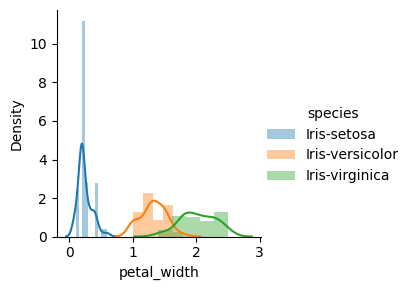

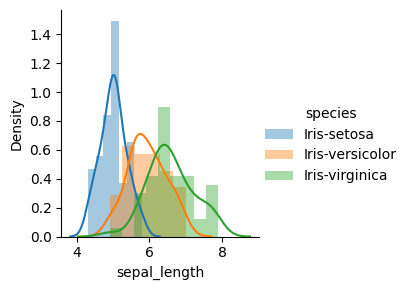

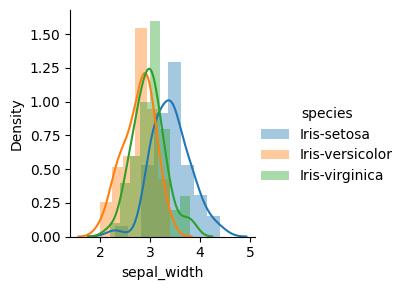

In [ ]:
sns.FacetGrid(iris, hue='species', height=3).map(sns.distplot, "petal_length").add_legend()
sns.FacetGrid(iris, hue='species', height=3).map(sns.distplot, "petal_width").add_legend()
sns.FacetGrid(iris, hue='species', height=3).map(sns.distplot, "sepal_length").add_legend()
sns.FacetGrid(iris, hue='species', height=3).map(sns.distplot, "sepal_width").add_legend()

In [ ]:
from sklearn.cluster import KMeans
sse = []
x = iris.iloc[:, [0, 1, 2, 3]].values
for i in range(1, 9):
  kmeans = KMeans(n_clusters=i, init='random', max_iter=100, n_init=10, random_state = 2)
  kmeans.fit(x)
  sse.append(kmeans.inertia_)


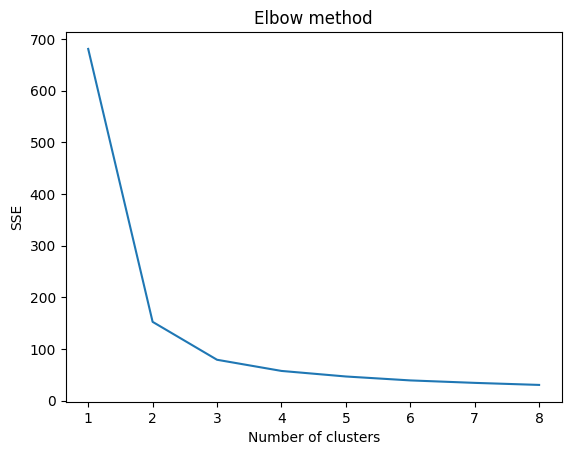

In [ ]:
plt.plot(range(1, 9), sse)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, n_init=10, random_state = 2)
y_kmeans = kmeans.fit_predict(x)

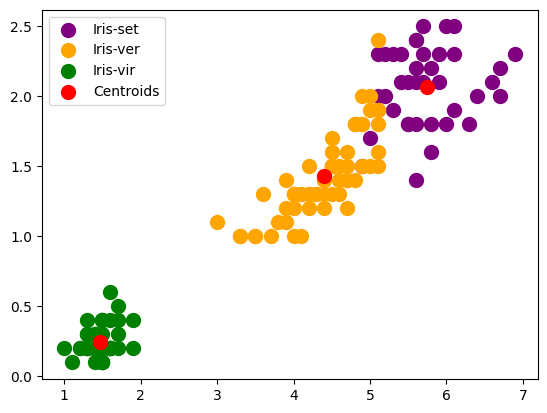

In [ ]:
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s=100, c='purple', label = 'Iris-set')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s=100, c='orange', label = 'Iris-ver')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s=100, c='green', label = 'Iris-vir')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=100, c='red', label = 'Centroids')
plt.legend()


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for k in range(2, 9):
  kmeans = KMeans(n_clusters=k, init='random', max_iter=100, n_init=10, random_state=2)
  cluster_labels = kmeans.fit_predict(x)
  score = silhouette_score(x, cluster_labels)
  silhouette_scores.append(score)

for i, score in enumerate(silhouette_scores, start=2):
  print(f"k ={i}, Score: {score}")


k =2, Score: 0.6808136202936816
k =3, Score: 0.5525919445499757
k =4, Score: 0.4978256901095472
k =5, Score: 0.49285559183161204
k =6, Score: 0.36815026092830333
k =7, Score: 0.3583580240469423
k =8, Score: 0.33984054066413516


In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering

## Construim graful KNN
k = 5
knn = NearestNeighbors(n_neighbors=k)
knn.fit(x)
distances, indices = knn.kneighbors(x)

In [ ]:
distances

array([[0.        , 0.1       , 0.14142136, 0.14142136, 0.14142136],
       [0.        , 0.14142136, 0.14142136, 0.17320508, 0.17320508],
       [0.        , 0.14142136, 0.24494897, 0.26457513, 0.26457513],
       [0.        , 0.14142136, 0.17320508, 0.2236068 , 0.24494897],
       [0.        , 0.14142136, 0.17320508, 0.17320508, 0.2236068 ],
       [0.        , 0.33166248, 0.34641016, 0.36055513, 0.37416574],
       [0.        , 0.2236068 , 0.26457513, 0.3       , 0.31622777],
       [0.        , 0.1       , 0.14142136, 0.17320508, 0.2       ],
       [0.        , 0.14142136, 0.3       , 0.31622777, 0.34641016],
       [0.        , 0.        , 0.        , 0.17320508, 0.17320508],
       [0.        , 0.1       , 0.28284271, 0.3       , 0.33166248],
       [0.        , 0.2236068 , 0.2236068 , 0.28284271, 0.3       ],
       [0.        , 0.14142136, 0.17320508, 0.17320508, 0.17320508],
       [0.        , 0.24494897, 0.31622777, 0.34641016, 0.47958315],
       [0.        , 0.41231056, 0.

In [ ]:
indices

array([[  0,  17,   4,  39,  27],
       [  1,  45,  12,  37,   9],
       [  2,  47,   3,  12,  45],
       [  3,  47,  29,  30,   2],
       [  4,   0,  17,  40,   7],
       [  5,  18,  10,  48,  44],
       [  6,  47,   2,  11,  42],
       [  7,  39,  49,   0,  17],
       [  8,  38,   3,  42,  13],
       [ 34,  37,   9,   1,  30],
       [ 10,  48,  27,  36,  19],
       [ 11,  29,   7,  26,  30],
       [ 12,   1,  34,  37,   9],
       [ 13,  38,  42,   8,  47],
       [ 14,  33,  16,  15,  18],
       [ 15,  33,  14,  16,   5],
       [ 16,  10,  48,  33,  19],
       [ 17,   0,  40,   4,  39],
       [ 18,   5,  10,  48,  20],
       [ 19,  21,  46,  48,   4],
       [ 20,  31,  27,  28,  10],
       [ 21,  19,  46,  17,   4],
       [ 22,   6,   2,  40,  42],
       [ 23,  26,  43,  39,   7],
       [ 24,  11,  29,  26,  30],
       [ 25,   9,  37,  34,   1],
       [ 26,  23,  43,   7,  39],
       [ 27,  28,   0,  39,  17],
       [ 28,  27,   0,  39,  17],
       [ 29,  

In [ ]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
## Creaam matricea de adiacenta
adj_matrix = np.zeros((x.shape[0], x.shape[0]))
for i in range(x.shape[0]):
  for j in indices[i]:
    adj_matrix[i, j] = 1

## Aplicam Spectral Clustering
num_clusters = 2
spectral = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', random_state=42)
cluster_labels = spectral.fit_predict(adj_matrix)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


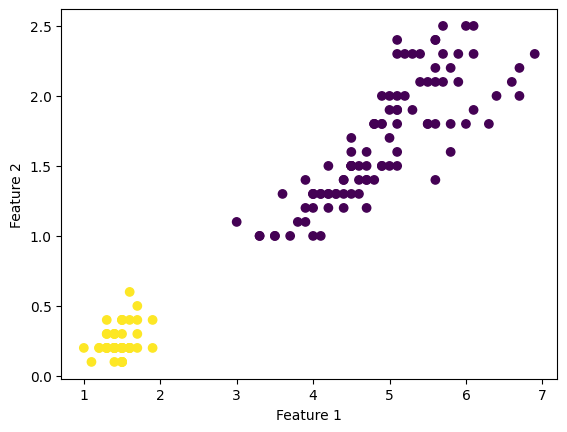

In [ ]:
plt.scatter(x[:, 2], x[:, 3], c=cluster_labels, cmap='viridis', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
unique, counts = np.unique(cluster_labels, return_counts=True)
print(unique, counts)

[0 1] [100  50]
